## Observations and Insights

One note of observation is that the mass of the mouse utilized had a positive correlation with the tumor size--the larger the mouse, generally the larger the tumor. One way to consider this information for addition effectiveness would a percentage of mass comparison, but that would have to take in addditional considerations with the information.

There is a distinct display of the best drugs based on the box plots, that being Capomulin and Ramicane. They had the smallest tumor size by far, with no outliers to display. Another interesting note is that the drug does not have a major impact initially based on the line chart, then had a dramatic impact that quickly reflected a change in volume. Something to consider with this is what the tipping point infers--why did the drug take so long to suddenly have a major impact?

As a final oberervation, none of the drugs had a major standard deviation, or outliers. This implies that they do not cause dramatic negative effects on the volume change. Perhaps some of the drugs are actually stunting the growth without bringing it down, which would be further points to consider.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
by_drug= combined_study_data.groupby("Drug Regimen")
drug_mean =by_drug["Tumor Volume (mm3)"].mean()
drug_median = by_drug["Tumor Volume (mm3)"].median()
drug_variance = by_drug["Tumor Volume (mm3)"].var()
drug_std = by_drug["Tumor Volume (mm3)"].std()
drug_sem = by_drug["Tumor Volume (mm3)"].sem()

by_drug_df = pd.DataFrame({"Tumor Volume Mean":drug_mean,
                          "Tumor Volume Median":drug_median,
                           "Tumor Volume Variance":drug_variance,
                          "Tumor Volume Standard Deviation":drug_std,
                          "Tumor Volume SEM": drug_sem})
by_drug_df 

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [3]:
combined_study_data["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

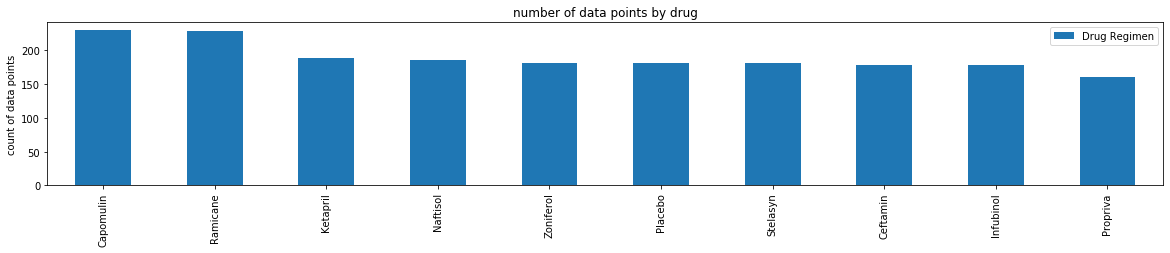

In [4]:
drug_data_points = combined_study_data["Drug Regimen"].value_counts()

# Generate a bar plot showing number of data points for each treatment regimen using pandas
by_drug_bar = drug_data_points.plot(kind="bar", figsize=(20,3), title = "number of data points by drug")

#set y label, as it was not set by the creation
by_drug_bar.set_ylabel("count of data points")
by_drug_bar.legend(loc="upper right")

Text(0.5, 1.0, 'count of data points by drug')

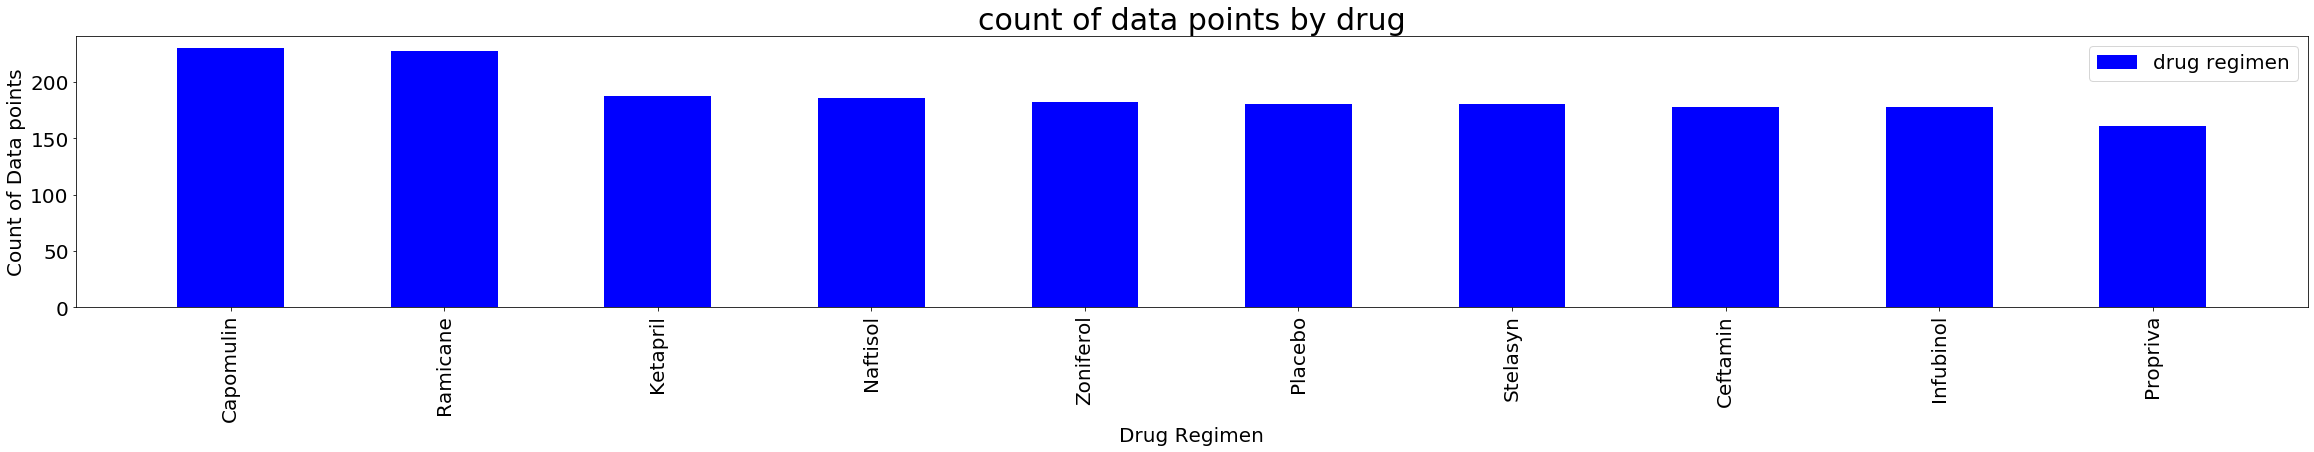

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#establish specific amount of ticks equal to the length of the drug datafile index
x_axis = np.arange(len(by_drug_df.index))
tick_locations = [value for value in x_axis]

#creating adjustable value for all individual piece so it can be edited unviersally
width = 0.5
#start setting up sizes for the chart
plt.figure(figsize=(40,5))

#bring in each calculation by drug. set the color to be as similar as possible
plt.bar(x_axis,drug_data_points,width, color='b', align="center", label = "drug regimen" )

#set the x axis labels
plt.xticks(tick_locations, drug_data_points.index, rotation="vertical", fontsize=20)

#set the legend, adust the size to match the above bar
plt.legend(loc="upper right",prop={'size': 20})

#adjust y axis font size to match above bar
plt.yticks(fontsize=20)

#set y label, and size to match
plt.ylabel("Count of Data points", size = 20)

#set x lable, and size to match
plt.xlabel("Drug Regimen", size = 20)

#set title, and size to match
plt.title("count of data points by drug", size = 30)

## Pie plots

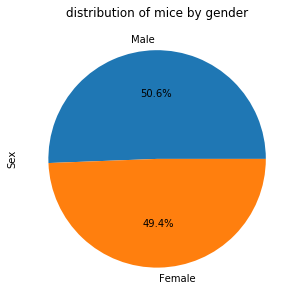

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
by_gender_count= combined_study_data["Sex"].value_counts()
by_gender_pie = by_gender_count.plot(kind="pie", figsize = (5,5),title = "distribution of mice by gender", autopct="%1.1f%%")



Text(0, 0.5, 'sex')

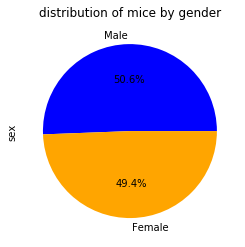

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue","orange"]

plt.pie(by_gender_count, labels=by_gender_count.index, colors=colors,
        autopct="%1.1f%%")
plt.title("distribution of mice by gender")
plt.ylabel("sex")

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#choosing the 4 regimens based on average volume of tumor being the lowest, while considering low variance, SEM
most_promising_df = combined_study_data.loc[(combined_study_data["Drug Regimen"] =="Capomulin")|(combined_study_data["Drug Regimen"] =="Ramicane")
                                             |(combined_study_data["Drug Regimen"] =="Ceftamin")|(combined_study_data["Drug Regimen"] =="Infubinol")]

#narrow down to the final timepoint
time_max = most_promising_df.groupby(["Mouse ID"])["Timepoint"].transform(max) == most_promising_df["Timepoint"]
final_tumor_drug = most_promising_df[time_max]
lowerq= final_tumor_drug["Tumor Volume (mm3)"].quantile(0.25)
upperq= final_tumor_drug["Tumor Volume (mm3)"].quantile(0.75)
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#running the data through the data calculated above to see if there are any outliers

outlier_data = final_tumor_drug.loc[(final_tumor_drug["Tumor Volume (mm3)"]<lower_bound)| (final_tumor_drug["Tumor Volume (mm3)"] > upper_bound)]

outlier_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [15]:
#pulling individual drug data for box plot
final_tumor_drug_Capomulin =final_tumor_drug.loc[(final_tumor_drug["Drug Regimen"] =="Capomulin")]
final_tumor_drug_Ceftamin =final_tumor_drug.loc[(final_tumor_drug["Drug Regimen"] =="Ceftamin")]
final_tumor_drug_Ramicane =final_tumor_drug.loc[(final_tumor_drug["Drug Regimen"] =="Ramicane")]
final_tumor_drug_Infubinol =final_tumor_drug.loc[(final_tumor_drug["Drug Regimen"] =="Infubinol")]

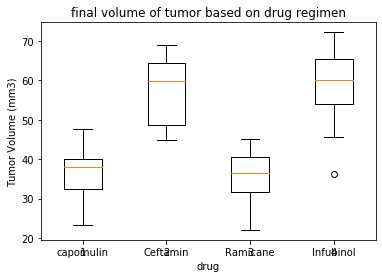

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('final volume of tumor based on drug regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel("drug")
plt.xticks([1,2,3,4],["capomulin","Ceftamin","Ramicane","Infubinol"])
ax1.boxplot([final_tumor_drug_Capomulin['Tumor Volume (mm3)'],final_tumor_drug_Ceftamin['Tumor Volume (mm3)'],
             final_tumor_drug_Ramicane['Tumor Volume (mm3)'],final_tumor_drug_Infubinol['Tumor Volume (mm3)']])
plt.show()


## Line and scatter plots

Text(0.5, 1.0, 'Capomulin treatment of Mouse l509')

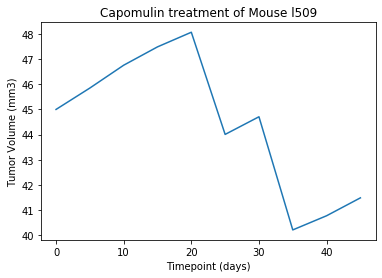

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse_df =combined_study_data.loc[(combined_study_data["Drug Regimen"] =="Capomulin")&(combined_study_data["Mouse ID"] =="l509")]
capomulin_time = capomulin_mouse_df.groupby(["Timepoint"])
capomulin_time.head()
plt.plot(capomulin_time["Tumor Volume (mm3)"].mean())                                     
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of Mouse l509")

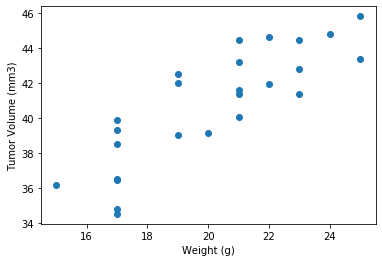

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df =combined_study_data.loc[(combined_study_data["Drug Regimen"] =="Capomulin")]
capomulin_df_tumor = capomulin_df[["Weight (g)","Tumor Volume (mm3)", "Mouse ID"]]
capomulin_df_tumor = capomulin_df_tumor.groupby("Mouse ID").mean()
#capomulin_df_weight = capomulin_df_tumor
x_values = capomulin_df_tumor["Weight (g)"]
y_values = capomulin_df_tumor["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_df_tumor["Weight (g)"],capomulin_df_tumor["Tumor Volume (mm3)"])
print(f'The correlation coefficient between the weight and tumor volume is {round(correlation[0],2)}')

The correlation coefficient between the weight and tumor volume is 0.84


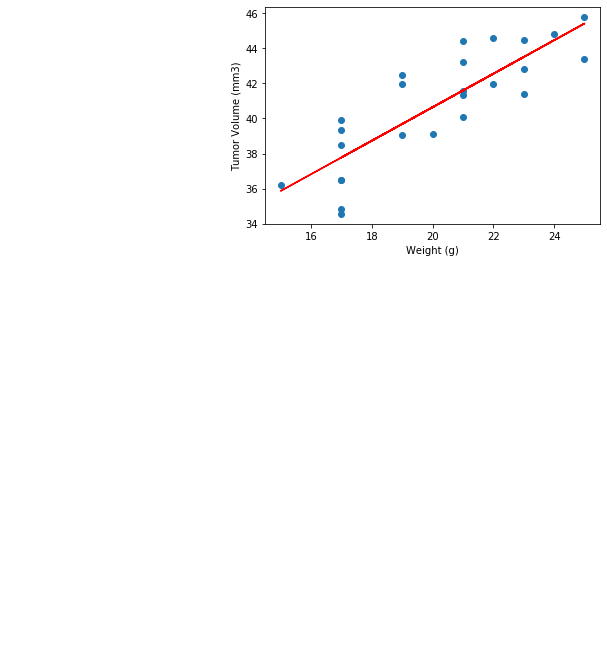

In [20]:
#creating the lingress information in order to graph it appropriately
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#utilizing the y=mx+b formula
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()